<h1><center>Data Science for Businesses: Frequent Pattern-Mining & More</center></h1>

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import math
import itertools
import csv
import warnings
warnings.filterwarnings('ignore')

 
# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import networkx as nx
 
# Analysis
import mlxtend
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth, fpmax, fpcommon 

In [2]:
# Import further libraries if required
from statistics import mode
from scipy import stats as st
from sklearn.preprocessing import OneHotEncoder
from mlxtend.preprocessing import TransactionEncoder
from statistics import mean 

# Task 1: Frequent Pattern Mining

## Load Dataset1:

Start by reading data from the CSV file. You are free to use any method to load the dataset from file.

In [3]:
# Load data from Dataset1.csv
df = pd.read_csv('Dataset1.csv', sep=',',header=None) 
df

# with open("Dataset2.csv", 'r') as file:
#     csvreader = csv.reader(file)   
#     for row in csvreader:
#         print(row)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Exploratory Data Analysis:

In [4]:
## Exploratory Data Analysis
## Frequently Bought Products

## Data Preprocessing:

In [5]:
## Data Preprocessing
## You are free to use any method to pre process the dataset.

#Getting a list of lists containing our data
records = []
for i in range(0,len(df)):
    records.append([str(df.values[i,j]) for j in range(0,20)])

#Removing all Nan values from list of lists
cleaned_list = [[value for value in inner_list if value != 'nan'] for inner_list in records]

# #Inspired by http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/
te = TransactionEncoder()
te_df = te.fit(cleaned_list).transform(cleaned_list) 
encoded_df = pd.DataFrame(te_df, columns = te.columns_) 
encoded_df

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Apriori algorithm

Implementation of the **Apriori algorithm** for frequent itemsets mining.

### Identify Unique Items

Listing the unique items in the dataset

In [6]:
# Find and print all unique items in the dataset
unique = []
unique.append(encoded_df.columns)
print(unique)

[Index([' asparagus', 'almonds', 'antioxydant juice', 'asparagus', 'avocado',
       'babies food', 'bacon', 'barbecue sauce', 'black tea', 'blueberries',
       ...
       'turkey', 'vegetables mix', 'water spray', 'white wine',
       'whole weat flour', 'whole wheat pasta', 'whole wheat rice', 'yams',
       'yogurt cake', 'zucchini'],
      dtype='object', length=120)]


### Apriori Algorithm:

Printing all freqent itemsets using minimum support count of 1%.

In [7]:
# apriori() function evaluates support value for each product
#  minimum support = 1%
results_appriori = apriori(encoded_df, min_support=0.01, use_colnames=True)
results_appriori

,support,itemsets
0,0.020397,(almonds)
1,0.033329,(avocado)
2,0.010799,(barbecue sauce)
3,0.014265,(black tea)
4,0.011465,(body spray)
...,...,...
252,0.011065,"(ground beef, mineral water, milk)"
253,0.017064,"(spaghetti, mineral water, ground beef)"
254,0.015731,"(spaghetti, mineral water, milk)"
255,0.010265,"(olive oil, spaghetti, mineral water)"


In [8]:
# association_rules() function help us to understand relationship between antecedents and consequences products
## min_threshold = 0.3
# find confidence
association_rules(results_appriori, metric="confidence", min_threshold=0.3)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(avocado),(mineral water),0.033329,0.238368,0.011598,0.348000,1.459926,0.003654,1.168147
1,(burgers),(eggs),0.087188,0.179709,0.028796,0.330275,1.837830,0.013128,1.224818
2,(cake),(mineral water),0.081056,0.238368,0.027463,0.338816,1.421397,0.008142,1.151921
3,(cereals),(mineral water),0.025730,0.238368,0.010265,0.398964,1.673729,0.004132,1.267198
4,(chicken),(mineral water),0.059992,0.238368,0.022797,0.380000,1.594172,0.008497,1.228438
...,...,...,...,...,...,...,...,...,...
58,"(mineral water, milk)",(spaghetti),0.047994,0.174110,0.015731,0.327778,1.882589,0.007375,1.228597
59,"(olive oil, spaghetti)",(mineral water),0.022930,0.238368,0.010265,0.447674,1.878079,0.004799,1.378954
60,"(olive oil, mineral water)",(spaghetti),0.027596,0.174110,0.010265,0.371981,2.136468,0.005460,1.315071
61,"(pancakes, spaghetti)",(mineral water),0.025197,0.238368,0.011465,0.455026,1.908923,0.005459,1.397557


Printing all freqent itemsets using minimum support count of 3%.

In [9]:
#  minimum support = 3%

results_appriori2 = apriori(encoded_df, min_support=0.03, use_colnames=True)
results_appriori2


,support,itemsets
0,0.033329,(avocado)
1,0.033729,(brownies)
2,0.087188,(burgers)
3,0.030129,(butter)
4,0.081056,(cake)
5,0.046794,(champagne)
6,0.059992,(chicken)
7,0.163845,(chocolate)
8,0.080389,(cookies)
9,0.051060,(cooking oil)


In [10]:
# association_rules() function help us to understand relationship between antecedents and consequences products
## min_threshold = 0.25
# find confidence

association_rules(results_appriori2, metric="confidence", min_threshold=0.25)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357
1,(eggs),(mineral water),0.179709,0.238368,0.050927,0.283383,1.188845,0.008090,1.062815
2,(frozen vegetables),(mineral water),0.095321,0.238368,0.035729,0.374825,1.572463,0.013007,1.218270
3,(ground beef),(mineral water),0.098254,0.238368,0.040928,0.416554,1.747522,0.017507,1.305401
4,(ground beef),(spaghetti),0.098254,0.174110,0.039195,0.398915,2.291162,0.022088,1.373997
5,(milk),(mineral water),0.129583,0.238368,0.047994,0.370370,1.553774,0.017105,1.209650
6,(milk),(spaghetti),0.129583,0.174110,0.035462,0.273663,1.571779,0.012900,1.137061
7,(pancakes),(mineral water),0.095054,0.238368,0.033729,0.354839,1.488616,0.011071,1.180529
8,(spaghetti),(mineral water),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314
9,(mineral water),(spaghetti),0.238368,0.174110,0.059725,0.250559,1.439085,0.018223,1.102008


Printing all freqent itemsets using minimum support count of 5%.

In [11]:
#  minimum support = 5%
results_appriori3 = apriori(encoded_df, min_support=0.05, use_colnames=True) 
results_appriori3

,support,itemsets
0,0.087188,(burgers)
1,0.081056,(cake)
2,0.059992,(chicken)
3,0.163845,(chocolate)
4,0.080389,(cookies)
5,0.051060,(cooking oil)
6,0.179709,(eggs)
7,0.079323,(escalope)
8,0.170911,(french fries)
9,0.063325,(frozen smoothie)


In [12]:
# association_rules() function help us to understand relationship between antecedents and consequences products
## min_threshold = 0.2
# find confidence
association_rules(results_appriori3, metric="confidence", min_threshold=0.2)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357
1,(mineral water),(chocolate),0.238368,0.163845,0.052660,0.220917,1.348332,0.013604,1.073256
2,(mineral water),(eggs),0.238368,0.179709,0.050927,0.213647,1.188845,0.008090,1.043158
3,(eggs),(mineral water),0.179709,0.238368,0.050927,0.283383,1.188845,0.008090,1.062815
4,(spaghetti),(mineral water),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314
5,(mineral water),(spaghetti),0.238368,0.174110,0.059725,0.250559,1.439085,0.018223,1.102008


# FP Growth
Implementing the **FP Growth** for frequent itemsets mining.

Printing all freqent itemsets using minimum support count of 1%.

In [13]:
#  minimum support = 1%
fp1 = fpgrowth(encoded_df, min_support=0.01, use_colnames=True)
fp1

,support,itemsets
0,0.238368,(mineral water)
1,0.132116,(green tea)
2,0.076523,(low fat yogurt)
3,0.071457,(shrimp)
4,0.065858,(olive oil)
...,...,...
252,0.011465,"(cake, burgers)"
253,0.014131,"(cake, green tea)"
254,0.010265,"(cake, frozen vegetables)"
255,0.011865,"(cake, pancakes)"


In [14]:
# association_rules() function help us to understand relationship between antecedents and consequences products
## min_threshold = 0.3
# find confidence
association_rules(fp1, metric="confidence", min_threshold=0.3)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(low fat yogurt),(mineral water),0.076523,0.238368,0.023997,0.313589,1.315565,0.005756,1.109585
1,(shrimp),(mineral water),0.071457,0.238368,0.023597,0.330224,1.385352,0.006564,1.137144
2,(olive oil),(mineral water),0.065858,0.238368,0.027596,0.419028,1.757904,0.011898,1.310962
3,(olive oil),(spaghetti),0.065858,0.174110,0.022930,0.348178,1.999758,0.011464,1.267048
4,"(olive oil, spaghetti)",(mineral water),0.022930,0.238368,0.010265,0.447674,1.878079,0.004799,1.378954
...,...,...,...,...,...,...,...,...,...
58,(herb & pepper),(mineral water),0.049460,0.238368,0.017064,0.345013,1.447397,0.005275,1.162821
59,(herb & pepper),(ground beef),0.049460,0.098254,0.015998,0.323450,3.291994,0.011138,1.332860
60,(herb & pepper),(spaghetti),0.049460,0.174110,0.016264,0.328841,1.888695,0.007653,1.230543
61,(cake),(mineral water),0.081056,0.238368,0.027463,0.338816,1.421397,0.008142,1.151921


Printing all freqent itemsets using minimum support count of 3%.

In [15]:
#  minimum support = 3%
fp2 = fpgrowth(encoded_df, min_support=0.03, use_colnames=True)
fp2


,support,itemsets
0,0.238368,(mineral water)
1,0.132116,(green tea)
2,0.076523,(low fat yogurt)
3,0.071457,(shrimp)
4,0.065858,(olive oil)
5,0.063325,(frozen smoothie)
6,0.047460,(honey)
7,0.042528,(salmon)
8,0.033329,(avocado)
9,0.031862,(cottage cheese)


In [16]:
# association_rules() function help us to understand relationship between antecedents and consequences products
## min_threshold = 0.25
# find confidence
association_rules(fp2, metric="confidence", min_threshold=0.25)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(eggs),(mineral water),0.179709,0.238368,0.050927,0.283383,1.188845,0.008090,1.062815
1,(milk),(mineral water),0.129583,0.238368,0.047994,0.370370,1.553774,0.017105,1.209650
2,(milk),(spaghetti),0.129583,0.174110,0.035462,0.273663,1.571779,0.012900,1.137061
3,(spaghetti),(mineral water),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314
4,(mineral water),(spaghetti),0.238368,0.174110,0.059725,0.250559,1.439085,0.018223,1.102008
5,(frozen vegetables),(mineral water),0.095321,0.238368,0.035729,0.374825,1.572463,0.013007,1.218270
6,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357
7,(pancakes),(mineral water),0.095054,0.238368,0.033729,0.354839,1.488616,0.011071,1.180529
8,(ground beef),(mineral water),0.098254,0.238368,0.040928,0.416554,1.747522,0.017507,1.305401
9,(ground beef),(spaghetti),0.098254,0.174110,0.039195,0.398915,2.291162,0.022088,1.373997


Printing all freqent itemsets using minimum support count of 5%.

In [17]:
#  minimum support = 5%
fp3 = fpgrowth(encoded_df, min_support=0.05, use_colnames=True) 
fp3


,support,itemsets
0,0.238368,(mineral water)
1,0.132116,(green tea)
2,0.076523,(low fat yogurt)
3,0.071457,(shrimp)
4,0.065858,(olive oil)
5,0.063325,(frozen smoothie)
6,0.179709,(eggs)
7,0.087188,(burgers)
8,0.062525,(turkey)
9,0.129583,(milk)


In [18]:
# association_rules() function help us to understand relationship between antecedents and consequences products
## min_threshold = 0.2
# find confidence
association_rules(fp3, metric="confidence", min_threshold=0.2)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(mineral water),(eggs),0.238368,0.179709,0.050927,0.213647,1.188845,0.008090,1.043158
1,(eggs),(mineral water),0.179709,0.238368,0.050927,0.283383,1.188845,0.008090,1.062815
2,(spaghetti),(mineral water),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314
3,(mineral water),(spaghetti),0.238368,0.174110,0.059725,0.250559,1.439085,0.018223,1.102008
4,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357
5,(mineral water),(chocolate),0.238368,0.163845,0.052660,0.220917,1.348332,0.013604,1.073256


## Comparison of Apriori and FP Growth

In [19]:
import timeit

In [20]:
## Overall Comparison "1%","3%","5%" for both Apriori and FP Growth
## Execution time comparison of Apriori and FP Growth
## plt.xlabel("Min. Support")
## plt.ylabel("Time (in sec)")
import_module = "from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth, fpmax, fpcommon"

fp1 = '''  
def fpgrowth():
    return fpgrowth(encoded_df, min_support=0.01, use_colnames=True)
'''

apriori1 = '''
def apriori():     
    return apriori(encoded_df, min_support=0.01, use_colnames=True) 
    '''

fp3 = '''   
def fpgrowth():
    return fpgrowth(encoded_df, min_support=0.03, use_colnames=True) '''  

apriori3 = ''' 
def apriori():
    return apriori(encoded_df, min_support=0.03, use_colnames=True)'''

fp5 = '''
def fpgrowth():
    return fpgrowth(encoded_df, min_support=0.05, use_colnames=True) '''

apriori5 = ''' 
def apriori():
    return apriori(encoded_df, min_support=0.05, use_colnames=True) '''

fp_times = []
apriori_times = []

#Checking avg times for fp growth at 1%
t_fp1 = timeit.repeat(stmt=fp1, setup=import_module, repeat=10)
avg_t_fp1 = mean(t_fp1)
fp_times.append(avg_t_fp1)
#Checking avg times for fp growth at 3%
t_fp3 = timeit.repeat(stmt=fp3, setup=import_module, repeat=10) 
avg_t_fp3 = mean(t_fp3)
fp_times.append(avg_t_fp3)
#Checking avg times for fp growth at 5%
t_fp5 = timeit.repeat(stmt=fp5, setup=import_module, repeat=10)
avg_t_fp5 = mean(t_fp5)
fp_times.append(avg_t_fp5)

#Checking avg times for apriori at 1%
t_ap1= timeit.repeat(stmt=apriori1, setup=import_module, repeat=10)
avg_ap1 = mean(t_ap1)
apriori_times.append(avg_ap1)
#Checking avg times for apriori at 3%
t_ap3 = timeit.repeat(stmt=apriori3, setup=import_module, repeat=10) 
avg_ap3 = mean(t_ap3)
apriori_times.append(avg_ap3)  
#Checking avg times for apriori at 5%
t_ap5 = timeit.repeat(stmt=apriori5, setup=import_module, repeat=10) 
avg_ap5 = mean(t_ap5)
apriori_times.append(avg_ap5)

x = [1,3,5]

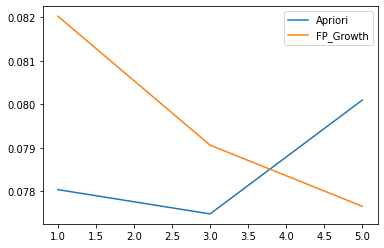

In [21]:
plt.plot(x, apriori_times, label = "Apriori") 
plt.plot(x, fp_times, label = "FP_Growth") 
plt.legend()
plt.show()

## Evaluation Takeaways:

a) Based on your results above, is there any performance difference between the two algorithms? If so which one is faster? [1 mark]

Ans: According to these results, FP-Growth is the faster algorithm

b) What impact does changing the minimum support value has and why? [2 marks]

Ans: Apriori Time increalargely remains the same the minimum support. This is because it goes over the dataset thrice, each time grouping itemsets from single, to double, to triple. When min_support increases, the more items should be filtered out initially. Despite less items to contend with, the complexity of calculations still remain similar. Hence, we observe only negligible changes. This could also be because coincidentally this dataset could have very few values below min_support. Maybe if we check 7, 9, 11, 13 percent of support, we can better analyze it.

FP-Growth time decreases with increasing min_support. This is because as min_support increases, the size of the items in question, reduces. The list is scanned only once. A smaller tree is formed as the min_support increases reducing the processing times.

c) The dataset contains around 7,500 transactions. Why were very few frequent itemsets returned? [2 marks]

Ans: Sparcity could be an issue. We have many products (120), but it could be the case that they rarely occur together, hence the low itemsets returned. 

# Task 2: Frequent Pattern Mining

## Load Dataset2:



In [36]:
# Load data from Dataset2.csv
csv_filename = 'Dataset2.csv' 
with open(csv_filename) as f:
        reader = csv.reader(f)
        dataset = list(reader)

dataset

# Apriori algorithm 

In this part, we implement the Apriori algorithm for frequent itemsets mining. 

### Identify Unique Items

List the unique items in the Dataset2

In [67]:
# Find and print all unique items in the dataset
cleaned_result = [[value for value in inner_list if value != ''] for inner_list in dataset] #Removing values like ''

unique_vals = {x for l in cleaned_result for x in l}
unique_vals

{'Bread',
 'Butter',
 'Cheese',
 'Coffee Powder',
 'Ghee',
 'Lassi',
 'Milk',
 'Panner',
 'Sugar',
 'Sweet',
 'Tea Powder',
 'Yougurt'}

### Implementation

My implentation takes in two parameters:
1.   Dataset (The data from which patterns will be extracted)
2.   Minimum Support

You have been provided with some function definitions but you are free to create your own.

In [155]:
#Create candidate 1 item sets
def createC1(dataSet):
        C1 = set()
        for transaction in dataSet:
            for item in transaction:
                itemSet = frozenset([item])
                C1.add(itemSet)     
        return C1

x = createC1(cleaned_result)
print(x)


# count = 0
# for transaction in cleaned_result:
#     count = count + 1
# x = 0
# for transaction in cleaned_result:
#     for item in transaction:
#         if item == 'Yougurt':
#             x = x + 1
#         else:
#             continue

# print(x)
# print(count)
# print(x/count)


   

{frozenset({'Coffee Powder'}), frozenset({'Cheese'}), frozenset({'Butter'}), frozenset({'Sweet'}), frozenset({'Yougurt'}), frozenset({'Panner'}), frozenset({'Milk'}), frozenset({'Tea Powder'}), frozenset({'Bread'}), frozenset({'Ghee'}), frozenset({'Lassi'}), frozenset({'Sugar'})}


In [156]:
#Looking for k-frequent itemsets
def selectLk(dataSet,Ck,minSupport):
        itemCount = {}
        for transaction in dataSet:
            for candidate in Ck:
                if candidate.issubset(transaction):
                    if candidate not in itemCount:
                        itemCount[candidate] = 1
                    else:
                        itemCount[candidate] += 1

        numItems = float(len(dataSet))
        Lk = set()     
        supportData = {}     
        for candidate in itemCount:
            support = itemCount[candidate] / numItems
            if support >= minSupport:
                Lk.add(candidate)
                supportData[candidate] = support
        return Lk, supportData


min_support = 0.4
lkkk = selectLk(cleaned_result, x, min_support)
print(lkkk)


({frozenset({'Coffee Powder'}), frozenset({'Cheese'}), frozenset({'Butter'}), frozenset({'Sweet'}), frozenset({'Yougurt'}), frozenset({'Panner'}), frozenset({'Milk'}), frozenset({'Tea Powder'}), frozenset({'Bread'}), frozenset({'Ghee'}), frozenset({'Lassi'}), frozenset({'Sugar'})}, {frozenset({'Coffee Powder'}): 0.4398052051732397, frozenset({'Cheese'}): 0.43717068497525147, frozenset({'Butter'}): 0.4375698547022194, frozenset({'Yougurt'}): 0.4393262015008782, frozenset({'Ghee'}): 0.43988503911863325, frozenset({'Lassi'}): 0.43365799137793387, frozenset({'Tea Powder'}): 0.4297461280536484, frozenset({'Panner'}): 0.4346159987226569, frozenset({'Bread'}): 0.43780935653840014, frozenset({'Sweet'}): 0.43772952259300657, frozenset({'Sugar'}): 0.43764968864761294, frozenset({'Milk'}): 0.44116238224493054})


In [157]:
def has_infrequent_subsets(itemset, Lk, k):
        for i in range(len(itemset)):
            subset = [itemset[j] for j in range(len(itemset)) if j!= i]
            if not frozenset(subset) in Lk:
                return True
        return False



def createCk(Lk,k): # Lk: Frequent itemsets containing k items
    Ck = set()
    lenLk = len(Lk)     
    listLk = list(Lk)     
    for i in range(lenLk):
        for j in range(i+1, lenLk):
            l1 = list(listLk[i])[:k-2]
            l2 = list(listLk[j])[:k-2]
            l1.sort()
            l2.sort()
            if l1 == l2:
                Ck_item = listLk[i] | listLk[j]
                Ck.add(Ck_item)
        return Ck

k = 1
Ck = createCk(lkkk,k)
print(Ck)

set()


In [164]:
#Apriori algorithm
def apriori(dataSet,minSupport):
    C1 = createC1(dataSet)
    L1, supportData = selectLk(dataSet, C1, minSupport)
    L = [L1]     
    k = 2     
    while len(L[k-2]) > 0:
        Ck = createCk(L[k-2], k) 
        Lk, supportK = selectLk(dataSet, Ck, minSupport)
        supportData.update(supportK)        
        L.append(Lk)
        k += 1     
    return supportData

### Evaluation

Run your implementation on the given dataset using the following values for minimum support:

1.   0.02
2.   0.10

Make sure to print the frequent itemsets generated by your algorithm



In [171]:
# Minimum support of 0.02
min_support = 0.02
frequent_itemsets = apriori(cleaned_list, min_support)
frequent_itemsets

{frozenset({'salmon'}): 0.04252766297826956,
 frozenset({'honey'}): 0.047460338621517134,
 frozenset({'mineral water'}): 0.23836821757099053,
 frozenset({'vegetables mix'}): 0.025729902679642713,
 frozenset({'olive oil'}): 0.0658578856152513,
 frozenset({'shrimp'}): 0.07145713904812692,
 frozenset({'cottage cheese'}): 0.03186241834422077,
 frozenset({'energy drink'}): 0.026663111585121985,
 frozenset({'low fat yogurt'}): 0.07652313024930009,
 frozenset({'frozen smoothie'}): 0.06332489001466471,
 frozenset({'green tea'}): 0.13211571790427942,
 frozenset({'avocado'}): 0.03332888948140248,
 frozenset({'almonds'}): 0.020397280362618318,
 frozenset({'tomato juice'}): 0.030395947207039063,
 frozenset({'burgers'}): 0.0871883748833489,
 frozenset({'eggs'}): 0.17970937208372217,
 frozenset({'meatballs'}): 0.020930542594320756,
 frozenset({'turkey'}): 0.06252499666711105,
 frozenset({'energy bar'}): 0.027063058258898813,
 frozenset({'whole wheat rice'}): 0.058525529929342755,
 frozenset({'milk'}

In [170]:
# Minimum support of 0.10
min_support = 0.10
frequent_itemsets = apriori(cleaned_list, min_support) 
frequent_itemsets

{frozenset({'mineral water'}): 0.23836821757099053,
 frozenset({'green tea'}): 0.13211571790427942,
 frozenset({'eggs'}): 0.17970937208372217,
 frozenset({'milk'}): 0.12958272230369283,
 frozenset({'french fries'}): 0.1709105452606319,
 frozenset({'spaghetti'}): 0.17411011865084655,
 frozenset({'chocolate'}): 0.1638448206905746}